In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt # matplotlib库用于绘图展示
# 魔法指令，直接展示图，Jupyter notebook特有
%matplotlib inline

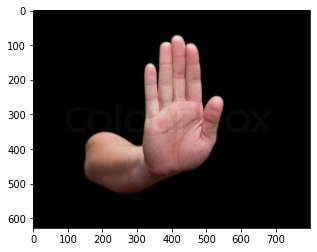

In [13]:
img = cv2.imread("hand.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

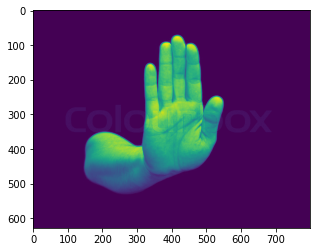

In [14]:
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.imshow(gray)

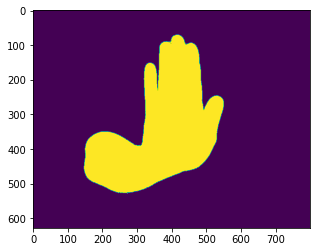

In [24]:
ret,binary = cv2.threshold(gray,20,255,cv2.THRESH_BINARY)
plt.imshow(binary)

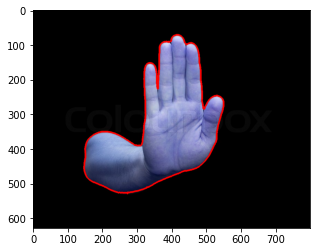

In [29]:
contours,_=cv2.findContours(binary,mode=cv2.RETR_EXTERNAL,method=cv2.CHAIN_APPROX_SIMPLE)
img2 = cv2.imread("hand.jpg",cv2.COLOR_BGR2RGB)
cv2.drawContours(img2, contours, -1, (255,0,0), 3);
plt.imshow(img2)

3

None
None
[[[    0     4     1   162]]

 [[    4     6     5   114]]

 [[    6    26    13  2590]]

 [[   26    28    27   142]]

 [[   29   211   126 33878]]

 [[  211   213   212   142]]

 [[  213   219   214   114]]

 [[  219   223   220   162]]

 [[  223   227   224   201]]

 [[  227   243   234   683]]

 [[  244   246   245   210]]

 [[  246   252   247   162]]

 [[  252   260   253   114]]

 [[  261   265   262   142]]

 [[  265   271   266   114]]

 [[  271   313   292   508]]

 [[  313   321   320   294]]

 [[  321   327   322   316]]

 [[  327   336   329   256]]

 [[  336   338   337   226]]

 [[  338   340   339   217]]

 [[  340   346   345   268]]

 [[  346   348   347   186]]

 [[  348   354   353   221]]

 [[  354   356   355   162]]

 [[  356   465   441  1580]]

 [[  465   471   466   191]]

 [[  471   473   472   167]]

 [[  474   480   475   154]]

 [[  480   482   481   142]]

 [[  482   514   503   229]]

 [[  514   516   515   162]]

 [[  516   518   517   186]]



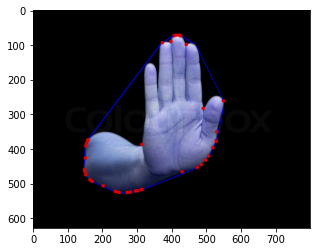

In [39]:
img3 = cv2.imread("hand.jpg",cv2.COLOR_BGR2RGB)

for contour in contours:
    points = cv2.convexHull(contour,returnPoints=False)
    defects = cv2.convexityDefects(contour,points)
    print(defects)
    if defects is not None:
        for j in range(defects.shape[0]):
            s, e, f, d = defects[j, 0]
            start = tuple(contour[s][0])
            end = tuple(contour[e][0])
            far = tuple(contour[f][0])
            # 用红色连接凸缺陷的起始点和终止点
            cv2.line(img3, start, end, (0, 0, 225), 2)
            # 用蓝色最远点画一个圆圈
            cv2.circle(img3, far, 5, (225, 0, 0), -1)
    # cv2.drawContours(img3,points,-1,(255,0,0),thickness=3)
plt.imshow(img3)